In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as tkr

TF_list = ["LHX2", "NeuN", "Olig2", "PU1"]
TF_actual_name = ["Astrocyte", "Neuron", "Oligodendrocyte", "Microglia"]
def aggregate(ifile):
    scores_agg = [0 for i in range(1000)]
    for line in open(ifile):
        elems = line.split(";")
        for elem_idx in range(len(elems)):
            scores_agg[elem_idx] += abs(float(elems[elem_idx]))
    scores_agg_norm = [elem/sum(scores_agg) for elem in scores_agg]
    return scores_agg_norm

def read_scores(path):
    scores_list = []
    for TF in TF_list:
        filename = os.path.join(path, TF, "annations_abs/scores.txt")
        scores = aggregate(filename)
        print(np.max(scores), np.std(scores))
        scores_list.append(scores)
    return scores_list
        

def draw_plots(scores_list, suffix, withxticks, vmax=0.003, height=2):
    for idx in range(len(scores_list)):
        scores_list[idx] += [0]
    weights_df = pd.DataFrame(scores_list)
    weights_df.index = TF_actual_name
    f, ax = plt.subplots(figsize=(15,height))
    if withxticks:
        g = sns.heatmap(weights_df, cmap="Blues", vmin=0, vmax=vmax, cbar=False, xticklabels=100)
        g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 12, fontname="Arial")
        g.set_xlabel("Position", size=12, fontname="Arial")
    else:
        g = sns.heatmap(weights_df, cmap="Blues", vmin=0, vmax=vmax, cbar=False, xticklabels=False)
        
    bottom, top = g.get_ylim()
    g.set_ylim(bottom + 0.5, top - 0.5)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12, fontname="Arial")
    
    figure = g.get_figure()
    #figure.savefig("agg_scores_%s.pdf" %suffix)
    
def draw_plots_vis(scores_list, suffix):
    fig = plt.figure()
    fig.set_size_inches((7/4.0*3, 4/4.0*3))
    ax = fig.add_subplot(111)
    for TF_idx in range(len(scores_list)):
        ax.scatter([idx for idx in range(len(scores_list[TF_idx]))], scores_list[TF_idx],
                   marker="o", s=0.5, label=TF_actual_name[TF_idx])
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel("Position", size=12, fontname="Arial");
    ax.set_ylabel("Importance score", size=12, fontname="Arial")
    ax.set_ylim(0, 0.0046)
    ax.ticklabel_format(style='scientific', axis="y", scilimits=(0, 0))
    ax.legend(fontsize=9, markerscale=10, edgecolor="white", loc=2)
    #fig.savefig("agg_score_vis_%s.pdf" %(suffix))
    
def draw_colorbar(scores_list, suffix, vmax=0.003):
    weights_df = pd.DataFrame(scores_list)
    weights_df.index = TF_actual_name
    grid_kws = {"height_ratios": (.3, .05), "hspace": .4}
    f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(5, 3))

    formatter = tkr.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    g = sns.heatmap(weights_df, cmap="Blues", vmin=0, vmax=vmax,
                    xticklabels=False, ax=ax, cbar_ax=cbar_ax,
                    cbar_kws={"orientation": "horizontal", "format": formatter})
    bottom, top = g.get_ylim()
    g.set_ylim(bottom + 0.5, top - 0.5)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12, fontname="Arial")
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.xaxis.tick_top()
    
    figure = g.get_figure()
    #figure.savefig("agg_scores_cbar_%s.pdf" %suffix)
        

Populating the interactive namespace from numpy and matplotlib


0.0011142231744067596 8.505327915405072e-05
0.0011597639152905767 8.945945064551457e-05
0.0011418926483873816 8.84658412834519e-05
0.001188466433952699 8.996966771683029e-05


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


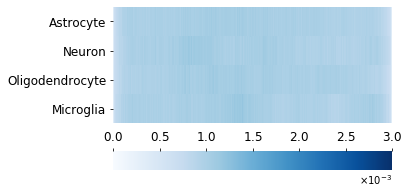

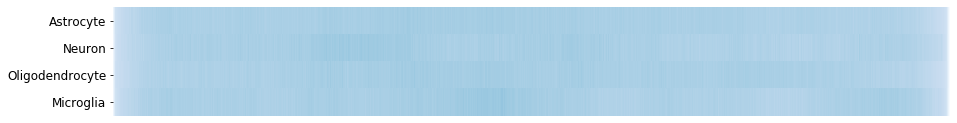

In [2]:
path = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/results_extended_control_sliding"
scores_list = read_scores(path)
draw_colorbar(scores_list, suffix = "shift")
draw_plots(scores_list, suffix = "shift", withxticks=False)

0.0025163893072486757 0.0005604953887339276
0.002819513276729412 0.0006465667849580972
0.002694882095004664 0.0005781111066788629
0.0029080429746804514 0.0006215378292473438


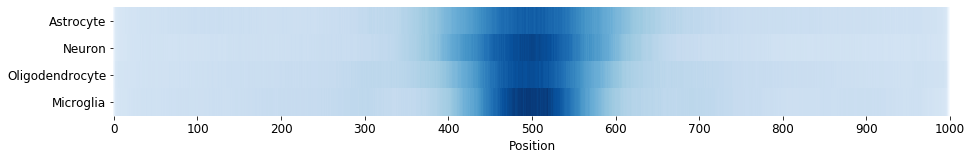

In [3]:
path = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/results_extended_control_no_sliding"
scores_list = read_scores(path)
draw_plots(scores_list, suffix = "noshift", withxticks=True)

0.003699075086228946 0.0010513275800766867
0.0037736005762554372 0.0010569569409099254
0.004244700345762338 0.001141695762134373
0.004106650650995217 0.0011171893713609264


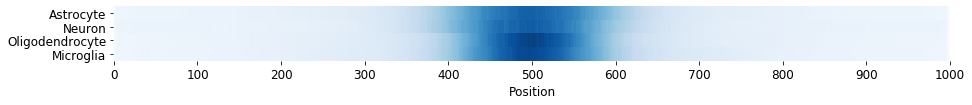

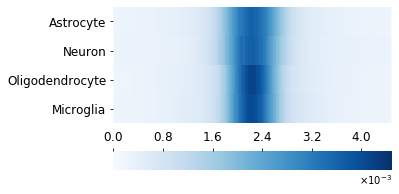

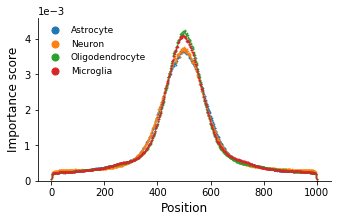

In [4]:
path = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/results_extended_coordconv_sliding"
scores_list = read_scores(path)
draw_plots(scores_list, suffix = "standard", withxticks=True, vmax=0.0045, height=1)
draw_colorbar(scores_list, suffix = "standard", vmax=0.0045)
draw_plots_vis(scores_list, suffix = "standard")